In [1]:
#%pip install numpy==1.26.4 pandas==2.2.3 scikit-learn==1.5.2 matplotlib==3.9.2 seaborn==0.13.2 tensorflow==2.18.0 keras==3.8.0 plotly==5.21.0

In [2]:
#for data
import numpy as np
import pandas as pd

#for machine learning
import keras

#for data visualization
import plotly.express as px

In [3]:
#load dataset
StudentsPerformance_dataset = pd.read_csv(r'C:\Users\Ali\Desktop\MachineLearning\LinearRegression\StudentsPerformance.csv')

In [4]:
#read dataset
training_df = StudentsPerformance_dataset.loc[:, ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score','reading score','writing score')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 1000




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
195,male,group D,associate's degree,standard,none,61,55,52
196,male,group C,some high school,free/reduced,completed,59,69,65
197,male,group E,high school,free/reduced,none,55,56,51
198,female,group B,some college,free/reduced,none,45,53,55


In [5]:
#view dataset statistics
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 1000




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
# List of categorical columns we want to inspect
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

print("Unique label counts per categorical column:")
for col in categorical_cols:
    # .nunique() gives the number of distinct labels
    unique_count = training_df[col].nunique(dropna=False)
    # .unique() returns the actual labels so you can inspect them if needed
    unique_labels = training_df[col].unique()
    print(f"  • {col}: {unique_count} distinct values → {unique_labels}")


Unique label counts per categorical column:
  • gender: 2 distinct values → ['female' 'male']
  • race/ethnicity: 5 distinct values → ['group B' 'group C' 'group A' 'group D' 'group E']
  • parental level of education: 6 distinct values → ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
  • lunch: 2 distinct values → ['standard' 'free/reduced']
  • test preparation course: 2 distinct values → ['none' 'completed']


In [27]:
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

X_cat = pd.get_dummies(training_df[categorical_cols], drop_first=False)

X_num = training_df[["reading score", "writing score"]]

X_all = pd.concat([X_cat, X_num], axis=1)

corr_full = pd.concat([X_all, training_df["math score"]], axis=1).corr(numeric_only=True)
corr_with_math_full = corr_full["math score"].drop("math score")

positive_corr = corr_with_math_full[corr_with_math_full > 0].sort_values(ascending=False)
negative_corr = corr_with_math_full[corr_with_math_full < 0].sort_values(ascending=True)

print("🔷 Positive Correlations (desc)")
print(positive_corr)

print("\n🔻 Negative Correlations (desc)")
print(negative_corr)

🔷 Positive Correlations (desc)
reading score                                     0.817580
writing score                                     0.802642
lunch_standard                                    0.350877
race/ethnicity_group E                            0.205855
test preparation course_completed                 0.177702
gender_male                                       0.167982
parental level of education_bachelor's degree     0.079664
parental level of education_associate's degree    0.063228
parental level of education_master's degree       0.060417
race/ethnicity_group D                            0.050071
parental level of education_some college          0.037056
Name: math score, dtype: float64

🔻 Negative Correlations (desc)
lunch_free/reduced                             -0.350877
test preparation course_none                   -0.177702
gender_female                                  -0.167982
parental level of education_high school        -0.128725
race/ethnicity_group A     

In [8]:
def sanitize(col: str) -> str:                       
    """Remove/replace characters Keras can't accept in layer names."""
    unsafe = ['/', ' ', "'", '(', ')', ':']
    for ch in unsafe:
        col = col.replace(ch, '_')
    while '__' in col:
        col = col.replace('__', '_')
    return col.strip('_')

selected_features_raw = [
    "reading score",          
    "writing score",
]

selected_features = [sanitize(c) for c in selected_features_raw]

training_df_selected = training_df[selected_features_raw].copy()
training_df_selected.columns = selected_features  
training_df_selected["math_score"] = training_df["math score"]

In [ ]:
#Code – Define ML functions 

from dataclasses import dataclass
from typing import List

import matplotlib.pyplot as plt

@dataclass
class ExperimentSettings:
    learning_rate: float
    number_epochs: int
    batch_size: int
    input_features: List[str]


@dataclass
class Experiment:
    name: str
    settings: ExperimentSettings
    model: keras.Model
    history: keras.callbacks.History


def create_model(settings: ExperimentSettings,
                 metrics: List[keras.metrics.Metric]) -> keras.Model:
    """Build and compile a simple linear regression (Dense‑1) model."""
    inputs = {
        name: keras.Input(shape=(1,), name=name)
        for name in settings.input_features
    }
    x = keras.layers.Concatenate()(list(inputs.values()))
    outputs = keras.layers.Dense(units=1)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
        loss="mean_squared_error",
        metrics=metrics,
    )
    return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ExperimentSettings,
) -> Experiment:
    """Train the model and return an Experiment record."""
    features = {name: dataset[name].values for name in settings.input_features}
    label = dataset[label_name].values

    history = model.fit(
        x=features,
        y=label,
        batch_size=settings.batch_size,
        epochs=settings.number_epochs,
        verbose=1,
    )

    return Experiment(
        name=experiment_name,
        settings=settings,
        model=model,
        history=history,
    )


def plot_experiment_metrics(exp: Experiment, metric_names: List[str]) -> None:
    """Plot training metrics stored in model.history."""
    for metric in metric_names:
        plt.figure()
        plt.plot(exp.history.epoch, exp.history.history[metric])
        plt.xlabel("Epoch")
        plt.ylabel(metric.upper())
        plt.title(f"{exp.name} – {metric.upper()} vs Epochs")
        plt.show()


def plot_model_predictions(
    exp: Experiment,
    dataset: pd.DataFrame,
    label_name: str,
) -> None:
    """Scatter‑plot of predicted vs actual label values."""
    features = {name: dataset[name].values for name in exp.settings.input_features}
    y_true = dataset[label_name].values
    y_pred = exp.model.predict(features, verbose=0).flatten()

    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{exp.name} – Predicted vs Actual")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             linestyle="--")
    plt.show()

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16126.4053 - rmse: 126.7120   
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6671.7104 - rmse: 81.4797 
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1923.6461 - rmse: 43.6660 
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257.2149 - rmse: 15.9288 
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.8453 - rmse: 10.0907 
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 106.8668 - rmse: 10.3270 
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.5403 - rmse: 10.1234
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.7872 - rmse: 10.0843
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.8450 - rmse: 9.9409 
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.8056 - rmse: 9.9375   
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95.4604 - rmse: 9.7677   
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.6685 - rm

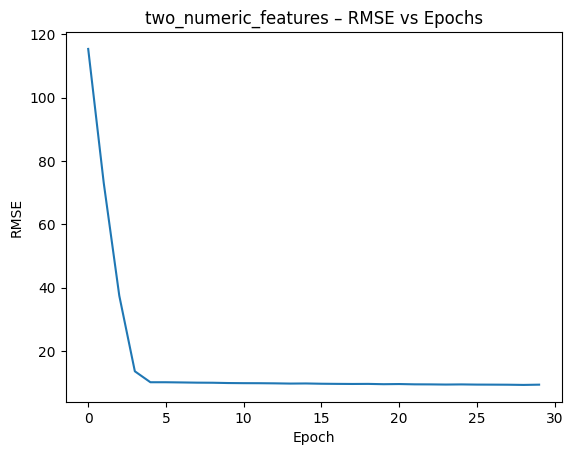

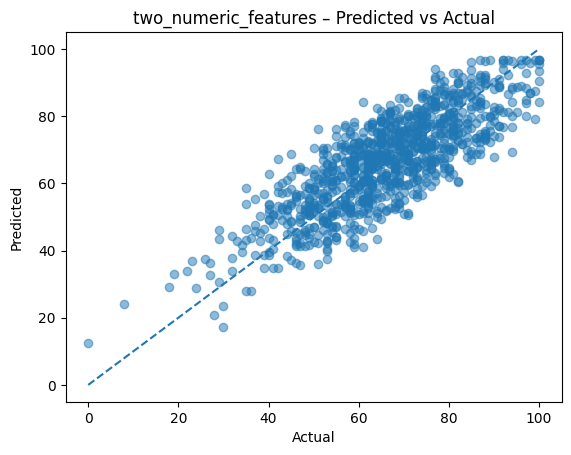

In [10]:
settings_1 = ExperimentSettings(
    learning_rate=0.01,
    number_epochs=30,
    batch_size=32,
    input_features=selected_features,  # ['reading_score', 'writing_score']
)


metrics = [keras.metrics.RootMeanSquaredError(name="rmse")]


model_1 = create_model(settings_1, metrics)



experiment_1 = train_model(
    "two_numeric_features",
    model_1,
    training_df_selected,
    "math_score",
    settings_1,
)

experiment_math = experiment_1

plot_experiment_metrics(experiment_1, ["rmse"])
plot_model_predictions(experiment_1, training_df_selected, "math_score")

In [11]:
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

X_cat = pd.get_dummies(training_df[categorical_cols], drop_first=False)


X_num = training_df[["reading score", "math score"]]  # math + reading sadece açıklayıcı rolünde


X_all = pd.concat([X_cat, X_num], axis=1)

corr_full = pd.concat([X_all, training_df["writing score"]], axis=1).corr(numeric_only=True)


corr_with_writing = corr_full["writing score"].drop("writing score")


positive_corr = corr_with_writing[corr_with_writing > 0].sort_values(ascending=False)
negative_corr = corr_with_writing[corr_with_writing < 0].sort_values(ascending=True)

print("🔷 Positive Correlations with writing score (desc)")
print(positive_corr)

print("\n🔻 Negative Correlations with writing score (desc)")
print(negative_corr)


🔷 Positive Correlations with writing score (desc)
reading score                                     0.954598
math score                                        0.802642
test preparation course_completed                 0.312946
gender_female                                     0.301225
lunch_standard                                    0.245769
parental level of education_bachelor's degree     0.128297
parental level of education_master's degree       0.125693
race/ethnicity_group E                            0.089077
race/ethnicity_group D                            0.082032
parental level of education_associate's degree    0.064799
parental level of education_some college          0.027989
Name: writing score, dtype: float64

🔻 Negative Correlations with writing score (desc)
test preparation course_none                   -0.312946
gender_male                                    -0.301225
lunch_free/reduced                             -0.245769
parental level of education_high school    

In [12]:
def sanitize2(col: str) -> str:                
    unsafe = ['/', ' ', "'", '(', ')', ':']
    for ch in unsafe:
        col = col.replace(ch, '_')
    while '__' in col:
        col = col.replace('__', '_')
    return col.strip('_')


selected_features_raw = [
    "reading score",
    "math score",
]

selected_features = [sanitize2(c) for c in selected_features_raw]
# -> ['reading_score', 'math_score']

training_df_selected = training_df[selected_features_raw].copy()
training_df_selected.columns = selected_features
training_df_selected["writing_score"] = training_df["writing score"] 

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5309.2085 - rmse: 72.4368  
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 990.5808 - rmse: 31.2154  
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56.1484 - rmse: 7.3894   
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6411 - rmse: 4.7532 
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.7246 - rmse: 4.8691 
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.4196 - rmse: 4.7333 
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9927 - rmse: 4.5800 
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1333 - rmse: 4.9937 
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.3024 - rmse: 4.7185 
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.4255 - rmse: 4.8324 
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.7189 - rmse: 4.6600 
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4848 - rmse: 4.5207 
Epoc

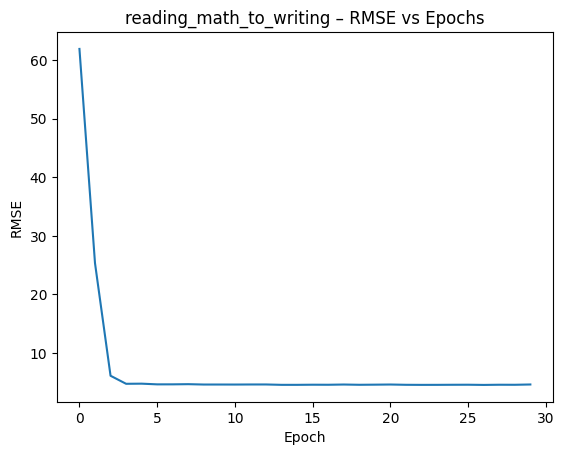

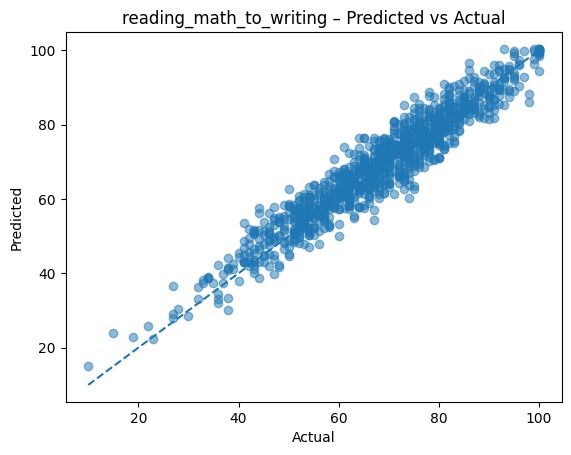

In [13]:
settings_1 = ExperimentSettings(
    learning_rate = 0.01,
    number_epochs = 30,
    batch_size = 32,
    input_features = selected_features,         
)

metrics = [keras.metrics.RootMeanSquaredError(name="rmse")]


model_1 = create_model(settings_1, metrics)

experiment_1 = train_model(
    "reading_math_to_writing",                    
    model_1,
    training_df_selected,
    "writing_score",                              
    settings_1,
)

plot_experiment_metrics(experiment_1, ["rmse"])
plot_model_predictions(experiment_1,
                       training_df_selected,
                       "writing_score")

In [14]:
# Kategorik sütunları tanımla
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

# 1) One‑Hot Encoding (kategorik) + sayısal sütunları birleştir
X_cat = pd.get_dummies(training_df[categorical_cols], drop_first=False)

# Sayısal sütunlar doğrudan
X_num = training_df[["math score", "writing score"]]

# Tüm özellikler DataFrame'i
X_all = pd.concat([X_cat, X_num], axis=1)

# 2) Korelasyon matrisi
corr_full = pd.concat([X_all, training_df["reading score"]], axis=1).corr(numeric_only=True)
corr_with_math_full = corr_full["reading score"].drop("reading score")

# 3) Pozitif ve negatif korelasyonları ayır, sıralı yazdır
positive_corr = corr_with_math_full[corr_with_math_full > 0].sort_values(ascending=False)
negative_corr = corr_with_math_full[corr_with_math_full < 0].sort_values(ascending=True)

print("🔷 Positive Correlations (desc)")
print(positive_corr)

print("\n🔻 Negative Correlations (desc)")
print(negative_corr)

🔷 Positive Correlations (desc)
writing score                                     0.954598
math score                                        0.817580
gender_female                                     0.244313
test preparation course_completed                 0.241780
lunch_standard                                    0.229560
race/ethnicity_group E                            0.106712
parental level of education_master's degree       0.106452
parental level of education_bachelor's degree     0.096024
parental level of education_associate's degree    0.064386
race/ethnicity_group D                            0.035177
parental level of education_some college          0.010782
Name: reading score, dtype: float64

🔻 Negative Correlations (desc)
gender_male                                    -0.244313
test preparation course_none                   -0.241780
lunch_free/reduced                             -0.229560
parental level of education_high school        -0.151068
race/ethnicity_group A  

In [15]:
def sanitize2(col: str) -> str:                
    unsafe = ['/', ' ', "'", '(', ')', ':']
    for ch in unsafe:
        col = col.replace(ch, '_')
    while '__' in col:
        col = col.replace('__', '_')
    return col.strip('_')


selected_features_raw = [
    "writing score",
    "math score",
]

selected_features = [sanitize2(c) for c in selected_features_raw]
# -> ['reading_score', 'math_score']

training_df_selected = training_df[selected_features_raw].copy()
training_df_selected.columns = selected_features
training_df_selected["reading_score"] = training_df["reading score"] 

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5167.2012 - rmse: 71.4271  
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 935.4863 - rmse: 30.3119  
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.8847 - rmse: 7.2516 
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6342 - rmse: 4.7567 
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.3571 - rmse: 4.6208 
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.3840 - rmse: 4.6236 
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.6645 - rmse: 4.4316 
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5910 - rmse: 4.7435 
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.3233 - rmse: 4.5042 
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.7988 - rmse: 4.3345 
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7278 - rmse: 4.4392 
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.6144 - rmse: 4.3124 
Epoch 

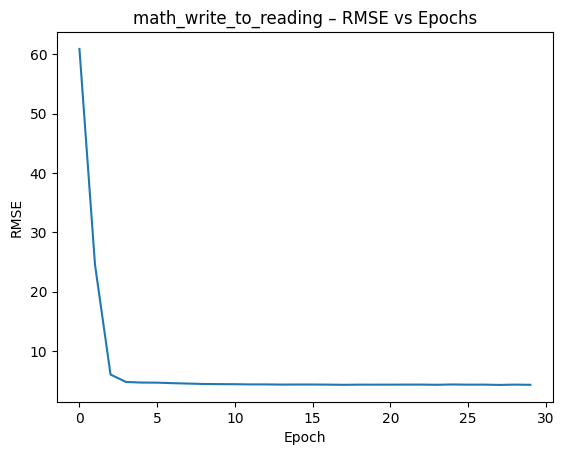

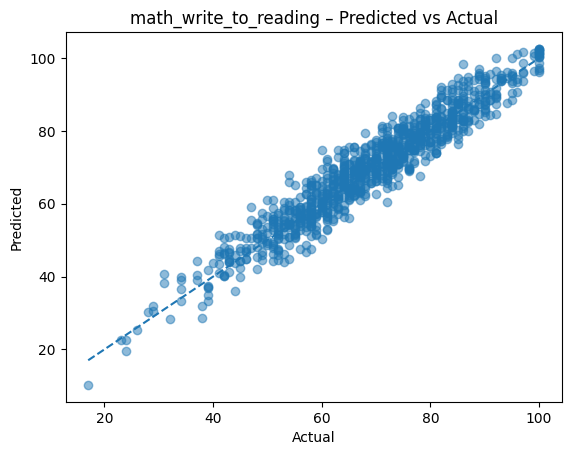

In [16]:
settings_read = ExperimentSettings(
    learning_rate = 0.01,
    number_epochs = 30,
    batch_size = 32,
    input_features = ["math_score", "writing_score"],   
)

metrics = [keras.metrics.RootMeanSquaredError(name="rmse")]

model_read = create_model(settings_read, metrics)

experiment_read = train_model(
    "math_write_to_reading",      
    model_read,
    training_df_selected,          
    "reading_score",               
    settings_read,
)

plot_experiment_metrics(experiment_read, ["rmse"])
plot_model_predictions(experiment_read,
                       training_df_selected,
                       "reading_score")

In [ ]:
def _pretty_label(label: str) -> str:
    """'math_score' → 'MATH'  |  'writing_score' → 'WRITING'  …"""
    return label.replace("_score", "").upper()

def _pretty_feature(feat: str) -> str:
    """reading_score -> READING_SCORE  |  writing score -> WRITING SCORE"""
    return feat.upper()

def predict_score_pretty(model,
                         df: pd.DataFrame,
                         features: list[str],
                         label: str,
                         batch_size: int = 50) -> pd.DataFrame:
    batch = df.sample(n=batch_size).copy()
    batch.index = range(batch_size)

    preds = model.predict_on_batch({f: batch[f].values for f in features}).flatten()

    nice_label = _pretty_label(label)
    out = {
        f"PREDICTED_{nice_label}": [f"{p:.2f}" for p in preds],
        f"OBSERVED_{nice_label}":  [f"{batch.at[i, label]:.2f}" for i in range(batch_size)],
        "L1_LOSS":                 [f"{abs(batch.at[i, label]-preds[i]):.2f}" for i in range(batch_size)],
    }

    for f in features:
        out[_pretty_feature(f)] = [
            f"{batch.at[i, f]:.2f}" if np.issubdtype(batch[f].dtype, np.number) else batch.at[i, f]
            for i in range(batch_size)
        ]

    return pd.DataFrame(out)


In [ ]:
out_math = predict_score_pretty(
    model    = experiment_math.model,
    df       = training_df_selected,
    features = experiment_math.settings.input_features,   
    label    = "math_score",
    batch_size = 20
)
show_predictions(out_math)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_MATH OBSERVED_MATH L1_LOSS READING_SCORE WRITING_SCORE
0           55.24         52.00    3.24         57.00         56.00
1           66.63         58.00    8.63         70.00         68.00
2           77.32         73.00    4.32         75.00         80.00
3           50.54         42.00    8.54         52.00         51.00
4           81.09         92.00   10.91         79.00         84.00
5           62.01         73.00   10.99         66.00         63.00
6           76.47         74.00    2.47         75.00         79.00
7           42.75         33.00    9.75         41.00         43.00
8           49.08         43.00    6.08         45.00         50.00
9           62.60         66.00    3.40         63.00         64.00
10       

In [ ]:
out_read = predict_score_pretty(
    model    = experiment_read.model,         
    df       = training_df_selected,
    features = experiment_read.settings.input_features,   
    label    = "reading_score",                
    batch_size = 20
)

show_predictions(out_read)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_READING OBSERVED_READING L1_LOSS MATH_SCORE WRITING_SCORE
0              68.64            70.00    1.36      58.00         68.00
1              77.54            71.00    6.54      61.00         78.00
2              78.89            72.00    6.89      59.00         80.00
3              80.54            79.00    1.54      79.00         78.00
4              74.67            74.00    0.67      74.00         72.00
5              47.30            52.00    4.70      51.00         44.00
6              53.53            58.00    4.47      48.00         52.00
7              61.26            65.00    3.74      49.00         61.00
8              86.09            90.00    3.91      77.00         85.00
9              60.55            55.00    5.55  

In [ ]:
out_write = predict_score_pretty(
    model    = experiment_write.model,            
    df       = training_df_selected,
    features = ["reading_score", "math_score"],   
    label    = "writing_score",                   
    batch_size = 20
)

show_predictions(out_write)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_WRITING OBSERVED_WRITING L1_LOSS READING_SCORE MATH_SCORE
0              61.47            75.00   13.53         64.00      59.00
1              58.98            57.00    1.98         61.00      62.00
2              41.14            48.00    6.86         42.00      50.00
3              59.04            54.00    5.04         61.00      63.00
4              78.51            80.00    1.49         81.00      86.00
5              84.06            85.00    0.94         88.00      75.00
6              74.79            71.00    3.79         77.00      84.00
7              64.13            66.00    1.87         66.00      72.00
8              85.98            91.00    5.02         90.00      77.00
9              61.70            61.00    0.70  